<a href="https://colab.research.google.com/github/eirikngard/GEO4902/blob/master/GEO4902_precipitation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Activate the following in colab : 
!pip3 install netCDF4
!apt install proj-bin libproj-dev libgeos-dev
!pip install https://github.com/matplotlib/basemap/archive/master.zip
    
import xarray as xr

     |████████████████████████████████| 4.3MB 7.8MB/s 
     |████████████████████████████████| 296kB 46.4MB/s 
Reading package lists... Done
Building dependency tree       
Reading state information... Done
Suggested packages:
  libgdal-doc
The following NEW packages will be installed:
  libgeos-dev libproj-dev proj-bin
0 upgraded, 3 newly installed, 0 to remove and 11 not upgraded.
Need to get 305 kB of archives.
After this operation, 1,706 kB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libgeos-dev amd64 3.6.2-1build2 [73.1 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 libproj-dev amd64 4.9.3-2 [199 kB]
Get:3 http://archive.ubuntu.com/ubuntu bionic/universe amd64 proj-bin amd64 4.9.3-2 [32.3 kB]
Fetched 305 kB in 1s (269 kB/s)
Selecting previously unselected package libgeos-dev.
(Reading database ... 144676 files and directories currently installed.)
Preparing to unpack .../libgeos-dev_3.6.2-1build2_amd64.deb .

In [2]:

import math
import numpy as np

def findindex(alat,alon,plat,plon):
    #finding identical location of pos plat, plon in array alat[],alon[]
    abslat = np.abs(alat-plat)
    abslon = np.abs(alon-plon)
    c = np.maximum(abslon,abslat)
    latlon_idx = np.argmin(c)
    x, y = np.where(c == np.min(c))
    #print(alats[x,y],alon[x,y])
    x=int(x)
    y=int(y)
   
    return (x,y)

In [8]:

year = '2020'; day = '29'; month = '09'
hour_1 = '00'; hour_2 = '06'

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_full_2_5km_'+year+month+day+'T'+hour_1+'Z.nc'
forecast_1 = xr.open_dataset(url)

url='https://thredds.met.no/thredds/dodsC/aromearcticarchive/'+year+'/'+month+'/'+day+'/arome_arctic_full_2_5km_'+year+month+day+'T'+hour_2+'Z.nc'
forecast_2 = xr.open_dataset(url)

In [10]:
lat0=60.3833; lon0=5.9500 # Kvamskogen in Western Norway

[ix,jx] = findindex(forecast_1.latitude,forecast_1.longitude,lat0,lon0) # from regional model AROME MetCoOp

In [ ]:

pp_acc_point_arome = arome.precipitation_amount_acc[:,0,ix,jx]
pp_acc_point_ecifs = ecifs.sel(lat=lat0,lon=lon0,method='nearest')

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: The following kwargs were not used by contour: 'extemd'


'\n# PLOT (2) GLOBAL MODEL\nax = plt.subplot(gs[1],aspect=\'equal\')\nm.drawcoastlines(color=\'#4D5D53\'); m.fillcontinents(alpha=0.2)\nparallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)\nmeridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)\nx, y = m(*np.meshgrid(ecifs.lon,ecifs.lat))\ncs=m.contourf(x,y,np.array( ecifs.TP[timestep,:,:]*1000),\n              cmap=plt.cm.coolwarm,extemd=\'max\',levels=levelsPP)\nplt.title (\'ECMWF-IFS \'+np.datetime_as_string(ecifs.time[0],unit=\'h\'))\ncbar = m.colorbar(cs,location=\'bottom\',pad="5%")  \ncbar.set_label(\'24-hour accumulated precipitation\')\n'

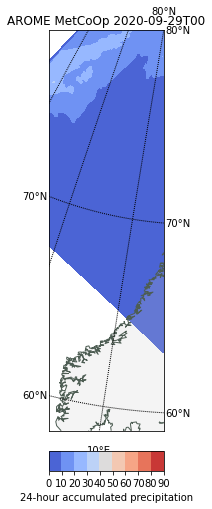

In [13]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec
import matplotlib.pyplot as plt


timestep=24 # 24-hour accumulated precipitation
levelsPP = range(0,100,10)

fig = plt.figure(figsize=(7.2,7.2)) 
gs = gridspec.GridSpec(1, 2)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)

m = Basemap(projection='stere', 
            boundinglat=57, lon_0=20, lat_0=62.4, 
            resolution='l', 
            llcrnrlat= 58.2, urcrnrlat=80, llcrnrlon=5.0, urcrnrlon=10.0)

# PLOT (1) REGIONAL MODEL

ax = plt.subplot(gs[0],aspect='equal')
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(forecast_1.longitude),np.array(forecast_1.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( forecast_1.precipitation_amount_acc[timestep,0,:,:]),
              cmap=plt.cm.coolwarm,extemd='max',levels=levelsPP)

plt.title ('AROME MetCoOp '+np.datetime_as_string(forecast_1.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('24-hour accumulated precipitation')    

'''
# PLOT (2) GLOBAL MODEL
ax = plt.subplot(gs[1],aspect='equal')
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(*np.meshgrid(ecifs.lon,ecifs.lat))
cs=m.contourf(x,y,np.array( ecifs.TP[timestep,:,:]*1000),
              cmap=plt.cm.coolwarm,extemd='max',levels=levelsPP)
plt.title ('ECMWF-IFS '+np.datetime_as_string(ecifs.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('24-hour accumulated precipitation')
'''

In [30]:

day='27'; month='09'; year='2020'; hour='00'

url='https://thredds.met.no/thredds/dodsC/aromemetcoopstarc/'+str(year)+'/'+str(month)+'/'+str(day)+'/AROME_MetCoOp_'+str(HH)+'_fp.nc_'+str(year)+str(month)+str(day)

#url = 'https://thredds.met.no/thredds/dodsC/metpparchive/'+year+'/'+month+'/'+day+'/met_forecast_1_0km_nordic_'+year+month+day+'T'+hour+'Z.nc'
arome = xr.open_dataset(url)

OSError: ignored

In [25]:
arome

<xarray.Dataset>
Dimensions:                                                         (time: 59, x: 1796, y: 2321)
Coordinates:
  * time                                                            (time) datetime64[ns] 2020-09-29 ... 2020-10-01T10:00:00
  * x                                                               (x) float64 -8.974e+05 ... 8.976e+05
  * y                                                               (y) float64 -1.104e+06 ... 1.216e+06
    latitude                                                        (y, x) float64 52.3 ... 72.18
    longitude                                                       (y, x) float64 1.918 ... 41.76
Data variables:
    forecast_reference_time                                         datetime64[ns] ...
    projection_lcc                                                  int32 ...
    altitude                                                        (y, x) float32 ...
    land_area_fraction                                              (y, x) float32 ...
    air_temperature_2m                                              (time, y, x) float32 ...
    precipitation_amount                                            (time, y, x) float32 ...
    wind_direction_10m                                              (time, y, x) float32 ...
    wind_speed_10m                                                  (time, y, x) float32 ...
    wind_speed_of_gust                                              (time, y, x) float32 ...
    cloud_area_fraction                                             (time, y, x) float32 ...
    air_pressure_at_sea_level                                       (time, y, x) float32 ...
    integral_of_surface_downwelling_shortwave_flux_in_air_wrt_time  (time, y, x) float32 ...
    relative_humidity_2m                                            (time, y, x) float32 ...
Attributes:
    institution:                     Norwegian Meteorological Institute, met.no
    creator_url:                     met.no
    geospatial_lat_min:              51.0
    geospatial_lat_max:              88.0
    geospatial_lon_min:              -20.0
    geospatial_lon_max:              80.0
    references:                      unknown
    license:                         http://met.no/sb5-met.no/Forskning/Infor...
    source:                          meps
    summary:                         Based on model data from MEPS (MetCoOp-E...
    Conventions:                     CF-1.0
    NCO:                             netCDF Operators version 4.7.9 (Homepage...
    meps_forecast_reference_time:    1601326800
    DODS_EXTRA.Unlimited_Dimension:  time

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:24: UserWarning: The following kwargs were not used by contour: 'extemd'


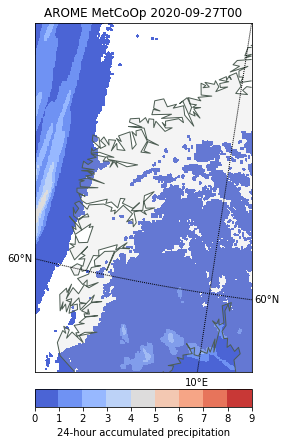

In [29]:
from mpl_toolkits.basemap import Basemap
import matplotlib.gridspec as gridspec

timestep=2*24 # 24-hour accumulated precipitation
levelsPP = range(0,10,1)

fig = plt.figure(figsize=(7.2,7.2)) 
gs = gridspec.GridSpec(1, 2)
plt.subplots_adjust(left=0.05, right=0.95, top=0.90, bottom=0.05, wspace=0.15, hspace=0.05)

m = Basemap(projection='stere', 
            boundinglat=57, lon_0=20, lat_0=62.4, 
            resolution='l', 
            llcrnrlat= 58.2, urcrnrlat=64.5, llcrnrlon=5.0, urcrnrlon=10.0)

# PLOT (1) REGIONAL MODEL

ax = plt.subplot(gs[0],aspect='equal')
m.drawcoastlines(color='#4D5D53'); m.fillcontinents(alpha=0.2)
parallels = np.arange(0.,90,10); m.drawparallels(parallels,labels=[1,1,1,0],fontsize=10)
meridians = np.arange(0.,360.,10); m.drawmeridians(meridians,labels=[0,0,0,1],latmax=80,fontsize=10)
x, y = m(np.array(arome.longitude),np.array(arome.latitude))               # compute map proj coordinates.
cs=m.contourf(x,y,np.array( arome.precipitation_amount[timestep,:,:]),
              cmap=plt.cm.coolwarm,extemd='max',levels=levelsPP)

plt.title ('AROME MetCoOp '+np.datetime_as_string(arome.time[0],unit='h'))
cbar = m.colorbar(cs,location='bottom',pad="5%")  
cbar.set_label('24-hour accumulated precipitation')    